# EDA
This notebook contain a EDA of the PDB data and alphaFold,RosetaFold datasets.
The data come from a veriety of places such as the PDB datasest.

The data set containes:
1. Primary Structure - sequence of a chaine of amino acids

    **File** : casp15/deepMeshi14_5_22/data/data30.txt.processed/seq.pt
<br><center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Protein_primary_structure.svg/1280px-Protein_primary_structure.svg.png" width=75%></center> 

2. Secondery structure - Protein secondary structure is the three dimensional form of local segments of proteins. The two most common secondary structural elements are alpha helices and beta sheets, though beta turns and omega loops occur as well. 
 
  * C - Carbon that attached to the carboxly group.
  * Calpha - alpha Carbon, first carbon atom that attaches to a functional group.
  * Cbeta - The second carbon atom.
  * N - Nitrogen.
  * H - Hydrogen, does not exist in the data.
  
<br><center><img src="https://www.researchgate.net/profile/Milos-Rankovic/publication/307606559/figure/fig1/AS:402885302079488@1473066749219/Representation-of-Alanine-amino-acid-Alpha-Carbon-Ca-is-the-so-called-backbone-Carbon.png" width=75%></center> 



  **Files** :  
  * casp15/deepMeshi14_5_22/data/data30.txt.processed/CoordCaNative.pt
  * casp15/deepMeshi14_5_22/data/data30.txt.processed/CoordCbNative.pt
  * casp15/deepMeshi14_5_22/data/data30.txt.processed/CoordCNative.pt 
  * casp15/deepMeshi14_5_22/data/data30.txt.processed/CoordNNative.pt
  
<br><center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c5/Alpha_beta_structure_%28full%29.png/405px-Alpha_beta_structure_%28full%29.png" width=75%></center> 

Explanation of the diffrent protein structures - https://www.youtube.com/watch?v=MODnIkQvyz0


**Questions:**
1. Were is the distrebution between sources of the Data**
2. GDTTS and IDDTS files?




## Importing libraries

In [16]:
# Pytorch libriaries
import torch 
from torch import nn
import numpy as np
import pandas as pd

import os 

# visualization
import plotly.express as px
from tqdm import tqdm


In [17]:
class CFG:
    proteinPath = '/Users/shaharcohen/Studies/MSc/research/DeepPEF/data'
    device = torch.device("cuda:0" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")  # Use GPU is avaliable

## Load datasets

In [56]:
seq_df = torch.load(CFG.proteinPath + '/seq.pt')  # [:200]
ids_df = torch.load(CFG.proteinPath + '/ids.pt')  # [:200]
coordN = torch.load(CFG.proteinPath + '/CoordN.pt')  # [:200]
coordAlpha = torch.load(CFG.proteinPath + '/CoordAlpha.pt')  # [:200]
coordC = torch.load(CFG.proteinPath + '/CoordC.pt')  # [:200]
coordBeta = torch.load(CFG.proteinPath + '/CoordBeta.pt')  # [:200]
nativemask = torch.load(CFG.proteinPath + '/nativemask.pt')  # [:200]
msk = torch.load(CFG.proteinPath + '/mask.pt')  # [:200]
gdtts = torch.load(CFG.proteinPath + '/GDTTS.pt')  # [:200]
iddts = torch.load(CFG.proteinPath + '/IDDTS.pt')  # [:200]
coordNNative = torch.load(CFG.proteinPath + '/CoordNNative.pt')  # [:200]
coordAlphaNative = torch.load(CFG.proteinPath + '/CoordCaNative.pt')  # [:200]
coordCNative = torch.load(CFG.proteinPath + '/CoordCNative.pt')  # [:200]
coordBetaNative = torch.load(CFG.proteinPath + '/CoordCbNative.pt')  # [:200]
# embeddings = torch.load(CFG.proteinPath + '/embeddings.pt')  # [:200]

In [ ]:
print(f"Number of squences:{len(seq_df)} ")
print(f"Number of rows in a sequence:{len(seq_df[0])} ")
print(f"Number of ids:{len(ids_df)} ")


Number of squences:42380 
Number of rows in a sequence:20 
Number of ids:42380 


Each sequence is represented with 20 rows(one for each amino acid) and the number of columns decided with the length of the sequence.

the mapping of the amino acid order is 

'A': '0', 'C': '1', 'D': '2', 'E': '3', 'F': '4', 'G': '5', 'H': '6', 'I': '7', 'K': '8', 'L': '9',
     'M': '10', 'N': '11', 'P': '12', 'Q': '13', 'R': '14', 'S': '15', 'T': '16', 'V': '17', 'W': '18',
     'Y': '19', '-': '20'

In [5]:
ids_df.index('1TKN_1_A__AlphaFold2')

25154

In [9]:
ids_df.index('2V66_1_B__RoseTTAFold')

34145

In [10]:
ids_df.index('2R7G_d2r7gc2__RoseTTAFold')

9141

In [51]:
len("KSTSLSLFYKKVYRLAYLRLNTLCERLLSEHPELEHIIWTLFQHTLQNEYELMRDRHLDQIMMCSMYGICKVKNIDLKFKIIVTAYKDLPHAVQETFKRVLIKEEEYDSIIVFYNSVFMQRLKTNILQYASTRPPTLSPIPHI")

143

torch.Size([143, 3])
tensor(99999.8984)
tensor(1)
tensor(67)


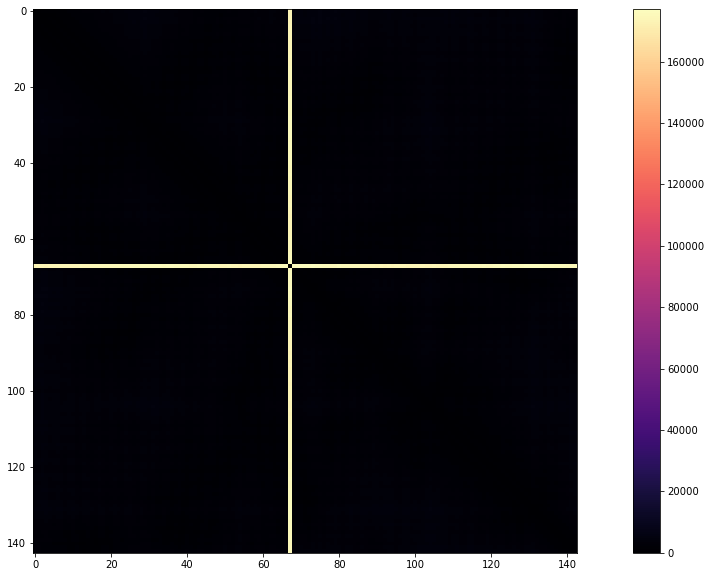

In [57]:
import matplotlib.pyplot as plt

a = coordBetaNative[9141]
# a[67] = 0
print(a.shape)
print(torch.max(a))
print((a[:,0] >9988).sum())
print(torch.argmax(a[:,0]))
# a = a * 0.1
D = torch.cdist(a,a,p=2)
plt.figure(figsize=(20, 10))
plt.imshow(D[:,:].squeeze().numpy(), cmap='magma', interpolation='nearest')
plt.colorbar()

In [15]:
ids_df.index('10#1JB0_12_X__RoseTTAFold')

2

In [5]:
np.array([i.T.shape for i in seq_df])

array([[210,  20],
       [210,  20],
       [ 35,  20],
       ...,
       [ 99,  20],
       [ 99,  20],
       [ 99,  20]])

In [6]:
print(seq_df[0])
print(ids_df[:5])

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
['10#1HF2_1_A__RoseTTAFold', '10#1HF2_1_A__RoseTTAFoldNT', '10#1JB0_12_X__RoseTTAFold', '10#1JB0_12_X__RoseTTAFoldNT', '10#1WAZ_1_A__RoseTTAFold']


**Q: there is no use of the order of the amino acids?**

In [7]:
ids_pr_df = pd.DataFrame()
ids_pr_df["full_name"]= ids_df
ids_pr_df["source"] = ids_pr_df["full_name"].apply(lambda x: x.split("__", 2)[-1])
ids_pr_df["?1"] = ids_pr_df["full_name"].apply(lambda x: x.split("_", 2)[0])
ids_pr_df["?2"] = ids_pr_df["full_name"].apply(lambda x: x.split("_", 2)[1])
ids_pr_df["?3"] = ids_pr_df["full_name"].apply(lambda x: x.split("_", 2)[2])
ids_pr_df["?4"] = ids_pr_df["full_name"].apply(lambda x: x.split("#", 2)[0])


In [8]:
ids_pr_df.head()
ids_pr_df[ids_pr_df["source"] == 'AlphaFold2']

,full_name,source,?1,?2,?3,?4
245,1BCS_1_A__AlphaFold2,AlphaFold2,1BCS,1,A__AlphaFold2,1BCS_1_A__AlphaFold2
584,1E1H_2_B__AlphaFold2,AlphaFold2,1E1H,2,B__AlphaFold2,1E1H_2_B__AlphaFold2
1444,1JEQ_1_A__AlphaFold2,AlphaFold2,1JEQ,1,A__AlphaFold2,1JEQ_1_A__AlphaFold2
1755,1KZQ_1_A__AlphaFold2,AlphaFold2,1KZQ,1,A__AlphaFold2,1KZQ_1_A__AlphaFold2
2745,1QSA_1_A__AlphaFold2,AlphaFold2,1QSA,1,A__AlphaFold2,1QSA_1_A__AlphaFold2
...,...,...,...,...,...,...
42365,5JG7_1_A__AlphaFold2,AlphaFold2,5JG7,1,A__AlphaFold2,5JG7_1_A__AlphaFold2
42368,5RUB_1_A__AlphaFold2,AlphaFold2,5RUB,1,A__AlphaFold2,5RUB_1_A__AlphaFold2
42371,7CEI_2_B__AlphaFold2,AlphaFold2,7CEI,2,B__AlphaFold2,7CEI_2_B__AlphaFold2
42374,7FD1_1_A__AlphaFold2,AlphaFold2,7FD1,1,A__AlphaFold2,7FD1_1_A__AlphaFold2


In [9]:
fig = px.histogram(ids_pr_df, ids_pr_df["source"].astype(str), color="source",
                   title="<b>Protein sequences source</b>",
                   labels={"x": "souce",
                           "y": "<b>Data counte</b>"})
fig.show()

**Q:**
- Where is the PDB Native data?
- Where is the mask data comes from
- In the training procedure when using rosettafold data, the training data is duplicate and contaion the same proteins.

In [10]:
# count same proteins
torch.Tensor(seq_df)

ValueError: only one element tensors can be converted to Python scalars

In [ ]:
i=2
torch.all(nativemask[2*i] == nativemask[2*i+1])

tensor(True)

In [ ]:
coordAlpha[2].shape

torch.Size([35, 3])

In [ ]:
len(coordAlpha)

42380

In [ ]:
coordAlpha[2]

tensor([[-2081.6001,   649.7000, -1877.3000],
        [-2103.1001,   702.2000, -1505.5000],
        [-1743.0000,   739.1000, -1351.9000],
        [-1690.4000,  1091.9000, -1261.5000],
        [-1359.4000,  1288.9000, -1315.7000],
        [-1077.1000,  1230.1000, -1062.5000],
        [ -808.6000,  1403.1000, -1270.5000],
        [ -911.8000,  1731.8000, -1177.3000],
        [ -643.6000,  1944.9000, -1036.5000],
        [ -709.5000,  1900.1000,  -679.3000],
        [ -696.8000,  1523.5000,  -708.9000],
        [ -376.2000,  1542.6000,  -903.3000],
        [ -221.5000,  1772.6000,  -654.5000],
        [ -324.8000,  1563.7000,  -361.8000],
        [ -204.8000,  1241.1000,  -511.2000],
        [  119.5000,  1405.7000,  -606.3000],
        [  183.4000,  1519.4000,  -257.2000],
        [   89.3000,  1182.2000,  -121.5000],
        [  322.9000,  1003.6000,  -353.1000],
        [  604.8000,  1241.4000,  -277.3000],
        [  538.0000,  1201.1000,    93.0000],
        [  563.3000,   823.1000,  

In [ ]:
msk

[tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In the mask file 1 are known and 0 is unknown in the tset

In [19]:
seq_df[0].mean(-1).shape

AttributeError: 'list' object has no attribute 'mean'

In [18]:
seq_df[0].shape

torch.Size([20, 210])

In [ ]:
seq_df[1].shape

torch.Size([20, 210])

In [41]:
counter = 0
for i in msk:
    start_i = torch.where(i)[0]
    end_i = torch.where(i)[-1]
    i = i[start_i[0]:]#end_i[-1]]
    if (torch.any(i==0)):
        counter+=1
        
print(counter)

2104


In [39]:
A1 = coordAlphaNative[0].t()
A2 = coordBetaNative[0].t()
A3 = coordCNative[0].t()
A4 = coordCNative[0].t()
cords_native = torch.stack((A1,A2,A3,A4), dim=1)
cords_native.shape
cords_native.unsqueeze(0).shape

torch.Size([1, 3, 4, 210])

In [38]:
embeddings[0].shape

torch.Size([210, 65])

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")  # Use GPU is avaliable


In [ ]:
import torch
import esm
import numpy as np
import gc
from tqdm import tqdm
import logging

logger = logging.getLogger()
fhandler = logging.FileHandler(filename='mylog.log', mode='a')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
fhandler.setFormatter(formatter)
logger.addHandler(fhandler)
logger.setLevel(logging.DEBUG)
logger.debug("started run")

device = torch.device('cpu')#("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")  # Use GPU is avaliable

def print_gpu():
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')
    
def get_emb():
    # Load ESM-2 model
    model, alphabet = torch.hub.load("facebookresearch/esm:main", "esm2_t30_150M_UR50D")
    batch_converter = alphabet.get_batch_converter()
    model = model.to(device)
    model.eval()  # disables dropout for deterministic results
    print('Finished loading model.')

    from tqdm import tqdm
    # Prepare data (first 2 sequences from ESMStructuralSplitDataset superfamily / 4)
    all_data = []
    # Using readlines()
    file = open('/Users/shaharcohen/Studies/MSc/research/DeepPEF/data/seq_primar.txt', 'r')
    index = 0
    while True:
        next_line = file.readline()
        if not next_line or index==10:
            break 
        all_data.append([index,next_line])
        index+=1
    seq_emb = []
    batch_size = 2
    for i in tqdm(np.arange(batch_size,len(all_data),batch_size)):
        #print_gpu()
        data = all_data[i-batch_size:i]
        batch_labels, batch_strs, batch_tokens = batch_converter(data)
        batch_lens = (batch_tokens != alphabet.padding_idx).sum(1)
        batch_tokens = batch_tokens.to(device)# move to GPU
        # Extract per-residue representations
        with torch.no_grad():
            results = model(batch_tokens, repr_layers=[30], return_contacts=True)
        token_representations = results["representations"][30]

        # Generate per-sequence representations via averaging
        # NOTE: token 0 is always a beginning-of-sequence token, so the first residue is token 1.
        sequence_representations = []
        for i, tokens_len in enumerate(batch_lens):
            sequence_representations.append(token_representations[i, 1 : tokens_len - 1].mean(0))
        seq_emb.extend(sequence_representations )
        del sequence_representations,token_representations,batch_lens,batch_labels, batch_strs, batch_tokens,results
        torch.cuda.empty_cache()
        gc.collect()
    torch.save(seq_emb,"esm2_t30_150M_UR50D_emb.pt")

def main():
    get_emb()
main()


Using cache found in /Users/shaharcohen/.cache/torch/hub/facebookresearch_esm_main


Finished loading model.


100%|██████████| 4/4 [00:04<00:00,  1.15s/it]


# Check embedings

In [ ]:
import torch 
emb_0 = torch.load('../data/esm2_t12_35M_UR50D/emb_0.pt')

In [9]:
# Move emmbedings to data2:
'''copy emmbeding from data to data2'''
emb_path = "../data/esm2_t12_35M_UR50D/"
emb_new_path = "../data/data2/"
for i in tqdm(np.arange(0,len(seq_df),1)):
    file = torch.load(emb_path+"emb_"+str(i)+".pt")
    torch.save(file,emb_new_path+str(i)+'/'+"emb_esm.pt")

100%|██████████| 42380/42380 [00:21<00:00, 1931.64it/s]


In [46]:
a = (torch.rand((2,10,4,3)))
a.shape

torch.Size([2, 10, 4, 3])

In [14]:
emb_new_path = "../data/data2/"
emb  =torch.load(os.path.join(emb_new_path, '0/emb_esm.pt'))
emb = torch.stack(emb)
emb.repeat(2,1).shape


torch.Size([2, 480])

In [47]:
a.mean(dim=-1,keepdim=True)

tensor([[[[0.4736],
          [0.4682],
          [0.9029],
          [0.5741]],

         [[0.5574],
          [0.5682],
          [0.6025],
          [0.8224]],

         [[0.7766],
          [0.5028],
          [0.1417],
          [0.3633]],

         [[0.6564],
          [0.9480],
          [0.6170],
          [0.4686]],

         [[0.1454],
          [0.4740],
          [0.6921],
          [0.5008]],

         [[0.8809],
          [0.3346],
          [0.5157],
          [0.4521]],

         [[0.5217],
          [0.3171],
          [0.3385],
          [0.4065]],

         [[0.3213],
          [0.5223],
          [0.6217],
          [0.1683]],

         [[0.4420],
          [0.6346],
          [0.5299],
          [0.7406]],

         [[0.4697],
          [0.5991],
          [0.3546],
          [0.2573]]],


        [[[0.3272],
          [0.5919],
          [0.4499],
          [0.6770]],

         [[0.1831],
          [0.3858],
          [0.7382],
          [0.6014]],

         [[0.5

In [48]:
a.shape

torch.Size([2, 10, 4, 3])

In [22]:
# a.reshape((2,4,3,10)).shape

In [25]:
Kcoords = nn.Parameter(nn.init.xavier_uniform_(torch.empty(2,3,50)))

In [28]:
res = torch.matmul(a, Kcoords[0])
res.shape

torch.Size([2, 10, 4, 50])

In [232]:
import torch.nn.functional as F
def getDistMatrices(Coords):
        # Coords is assumed to be of shape [B, 4, 3, N] [B,N,N,4,4]
        # Compute distance maps
        batchSize = Coords.shape[0]
        nnodes = Coords.shape[-1]
        I = torch.tensor([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3])
        J = torch.tensor([0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3])
        DI = torch.sum(Coords[:, I, :, :] ** 2, dim=2, keepdim=True)
        DJ = torch.sum(Coords[:, J, :, :] ** 2, dim=2, keepdim=True)
        DIJ = DI + DJ.transpose(3, 2)

        XI = Coords[:, I, :, :]
        XJ = Coords[:, J, :, :]
        XIXJ = torch.bmm(XJ.reshape(batchSize * 16, 3, -1).transpose(1, 2), XI.reshape(batchSize * 16, 3, -1))
        XTX = DIJ - 2 * XIXJ.reshape(batchSize, 16, nnodes, nnodes)
        XTX = torch.relu(XTX)

        return XTX

nopen = 64
sigma = 1+torch.rand(3*nopen, 16, 5 , 5)
sigma = nn.Parameter(sigma)
biasDistance = nn.Parameter(0.6*torch.ones(1, 3*nopen, 1, 1))

XTX = getDistMatrices(torch.rand(2,4,3,10)) # [B, 16, N, N]
print(XTX.shape, sigma.shape)
Z = F.conv2d(XTX, sigma.abs(), padding=sigma.shape[-1]//2-1)
print(Z.shape)
Z = F.normalize(Z, dim=[2,3])
D = torch.relu(torch.exp(-1e2*Z) - biasDistance)
print(D.shape)
A = torch.sum(D, dim=3)
print(A.shape)

torch.Size([2, 16, 10, 10]) torch.Size([192, 16, 5, 5])
torch.Size([2, 192, 8, 8])
torch.Size([2, 192, 8, 8])
torch.Size([2, 192, 8])


In [63]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)
Q = 3*a**3 - b**2
Z = Q.sum()

In [64]:
Z.backward()
print(a.grad)
Z.gead()

tensor([36., 81.])


AttributeError: 'Tensor' object has no attribute 'zero_grad'

In [57]:
Q2 = Q**2

In [67]:
a = torch.rand((2,10,4,3))
a[:,:,:,-1].shape

torch.Size([2, 10, 4])

In [69]:
m = nn.Conv1d(16, 33, 3, stride=2)
input = torch.randn(20, 16, 50)
output = m(input)
output.shape

torch.Size([20, 33, 24])

In [18]:
K = nn.Parameter(nn.init.xavier_uniform_(torch.empty(5,10, 5,4)))

In [44]:
import torch.nn.functional as F
D = torch.rand((3,10,16,1)) # B,N,16,1
print(D.shape)
A =  0.5*D.sum(dim=3) # B,N,16,1
print(A.shape)
emb = torch.rand(3,10,64).unsqueeze(-1) # B,N,64,1
print(emb.shape)
Fh = torch.cat((D,emb),dim=2) # B,N,80,1
Fh.shape
Fh = torch.matmul(Fh,A)+torch.matmul(Fh,D)

torch.Size([3, 10, 16, 1])
torch.Size([3, 10, 16])
torch.Size([3, 10, 64, 1])


torch.Size([3, 10, 80, 1])

In [247]:
a = torch.rand((2,4,3))
print(a)
print(a.reshape((2*4,3)))

tensor([[[0.9758, 0.4197, 0.9062],
         [0.0835, 0.0246, 0.2338],
         [0.4422, 0.8167, 0.2731],
         [0.2291, 0.2838, 0.4214]],

        [[0.7254, 0.1516, 0.9065],
         [0.5956, 0.6429, 0.9907],
         [0.7062, 0.5585, 0.1784],
         [0.2064, 0.6852, 0.1297]]])
tensor([[0.9758, 0.4197, 0.9062],
        [0.0835, 0.0246, 0.2338],
        [0.4422, 0.8167, 0.2731],
        [0.2291, 0.2838, 0.4214],
        [0.7254, 0.1516, 0.9065],
        [0.5956, 0.6429, 0.9907],
        [0.7062, 0.5585, 0.1784],
        [0.2064, 0.6852, 0.1297]])


In [42]:
D = torch.rand((3,10,4,3)) #B,N,4,3
torch.abs((D[:,:,:,1:]-D[:,:,:,:-1]))/(2*0.5)
print()

In [243]:
# get distance matrix
a = torch.rand((2,10,4,3)) # B,N,4,3
a = a.reshape((2,10*4,3))
dist = torch.cdist(a,a,p=2)
dist.shape
dist = dist.reshape((2,10,10,16))
dist == getDistMatrices(a.reshape(2,4,3,10)).reshape((2,10,10,16))

tensor([[[[ True, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False]],

         [[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False]],

         [[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False,

In [242]:
dist

torch.Size([2, 10, 10, 16])

In [208]:
dist.reshape(dist.shape[0],dist.shape[1],16).shape

torch.Size([2, 10, 16])

In [55]:
dist

tensor([[[0.0000, 0.1743, 0.2636, 0.4165],
         [0.1743, 0.0000, 0.3737, 0.5759],
         [0.2636, 0.3737, 0.0000, 0.4698],
         [0.4165, 0.5759, 0.4698, 0.0000]],

        [[0.0000, 0.4261, 0.9932, 0.6116],
         [0.4261, 0.0000, 1.1349, 0.3083],
         [0.9932, 1.1349, 0.0000, 1.0200],
         [0.6116, 0.3083, 1.0200, 0.0000]]])

../data/data2/0/
torch.Size([1, 10, 4, 3])


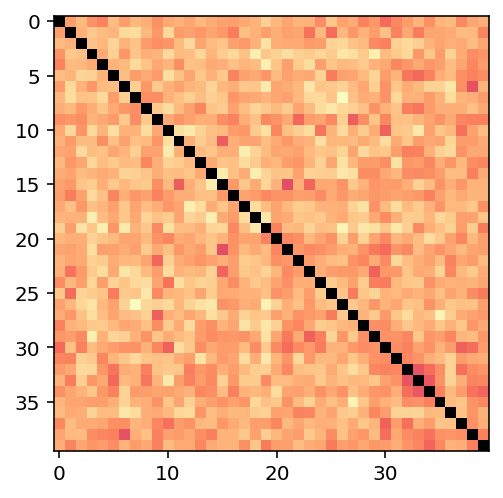

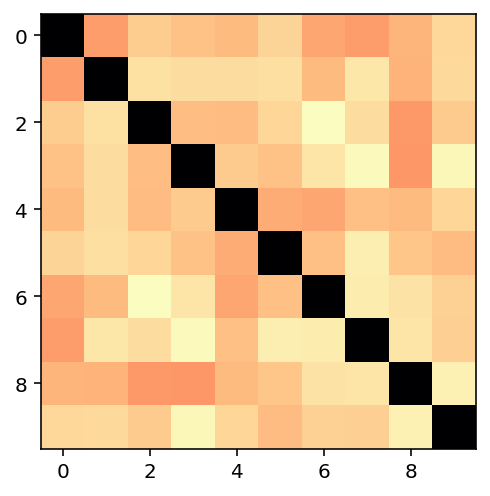

In [65]:
import torch
import matplotlib.pyplot as plt
import os
%matplotlib inline
%config InlineBackend.figure_format='retina'

data_path = '../data/data2'
index_path = os.path.join(data_path, '0/')
print(index_path)
coordsAlpha = torch.load(os.path.join(index_path, 'CoordAlpha.pt'))
coordsBeta = torch.load(os.path.join(index_path, 'CoordBeta.pt'))
coordsC = torch.load(os.path.join(index_path, 'CoordC.pt'))
coordsN = torch.load(os.path.join(index_path, 'CoordN.pt'))
coordsAlpha,coordsBeta, coordsC, coordsN = coordsAlpha.unsqueeze(1), coordsBeta.unsqueeze(1), coordsC.unsqueeze(1), coordsN.unsqueeze(1)
X_decoy = torch.cat((coordsAlpha,coordsBeta, coordsC, coordsN), dim=1)
X_decoy = X_decoy.unsqueeze(0)
X_decoy =X_decoy[:,:10,:,:]
print(X_decoy.shape)

h = 0.5
B,N_residu,N_atoms,N_cords = X_decoy.shape
cords_size = 64
Xd = torch.rand((B,N_residu*N_atoms,cords_size))                    # [batch_size, n_nodes ,num_atoms=4,new_cords_size]
# D = self.getDistMatrices(Xd.reshape(B,N_atoms,N_cords,N_residu))  # [batch_size, n_nodes, atom_dist=16, 1]    
D = torch.cdist(Xd,Xd,p=2)     # [batch_size, n_nodes, atom_dist=16]
#D = D.reshape(B,N_residu,N_residu,N_atoms**2)
plt.imshow(D[0,:,:].detach().numpy() ,cmap='magma',interpolation='nearest')
plt.show()
D = D.reshape(B,N_residu,N_atoms,N_residu,N_atoms)
D = torch.swapaxes(D,2,3)
D = D.reshape(B,N_residu,N_residu,N_atoms*N_atoms)
plt.imshow(D[0,:,:,0].detach().numpy(),cmap='magma',interpolation='nearest')
plt.show()
#   11 12 13 14 21 22 23 24
# 11
# 22
# 33
# 44
# 21
# 22
# 23
# 24

In [7]:
def get_dist_matrix(Xd):
        """
        Return the node distence matrix
        Args:
            Xd (tensor):X embeded [batch_size, n_nodes ,num_atoms=4,new_cords_size]
        Returns:
            tensor : [batch_size, n_nodes,n_nodes ,atom_dist=16] tensor
        """
        B,N_residu,N_atoms,coords_size = Xd.shape
        Xd = Xd.reshape(B,N_residu*N_atoms,coords_size)
        D = torch.cdist(Xd,Xd,p=2).reshape(B,N_residu,N_residu,N_atoms**2)      # [batch_size, n_nodes,n_nodes, atom_dist=16]
        return D
    
def get_Fh0(Xd,FS,h):
    """
    Return the node features
    Args:
        Xd (tensor):X decoy [batch_size, n_nodes ,num_atoms=4,new_cords_size]
        FS (_type_): node features [batch_size,n_nodes, embedding_size]
        h (_type_): derovative step

    Returns:
        tuple of tensors : ([batch_size,n_nodes, embedding_size+atom_dist], [batch_size,n_nodes, n_atoms])
    """
    B,N_residu,N_atoms,coords_size = Xd.shape
    D = get_dist_matrix(Xd)                                             # [batch_size, n_nodes,n_nodes, atom_dist=16]
    # Get the derivative of the distance matrix
    print(D.shape)
    G = (D[:,:,:,:-1]-D[:,:,:,1:])/(h)                                   # [batch_size, n_nodes,n_nodes, atom_dist=15]
    print(G.shape)
    # Get the average of the distance matrix
    A = 0.5*D.sum(dim=3,keepdim=True)                                   # [batch_size, n_nodes, atom_dist=16, 1]
    # First node features
    print(A.shape,G.shape,D.shape)
    A_G = torch.cat((A,G),dim=3)                                        # [batch_size, n_nodes, atom_dist=16, 1]
    print(A_G.shape,D.shape)
    FD =  torch.matmul(A_G.reshape(B,N_residu,N_atoms**2,N_residu),D)   # [batch_size,n_nodes, n_nodes]
    FD = FD.sum(dim=3)
    print(FD.shape,FS.shape)
    Fh = torch.cat((FD,FS),dim=2)                                       # [batch_size,n_nodes, embedding_size+n_nodes]
    return Fh,A_G

Xd = torch.rand((2,10,4,3),requires_grad=True) # B,N,4,3
Fh,A_G = get_Fh0(Xd,torch.rand((Xd.shape[0],Xd.shape[1],64)),h)
Fh.shape

torch.Size([2, 10, 10, 16])
torch.Size([2, 10, 10, 15])
torch.Size([2, 10, 10, 1]) torch.Size([2, 10, 10, 15]) torch.Size([2, 10, 10, 16])
torch.Size([2, 10, 10, 16]) torch.Size([2, 10, 10, 16])
torch.Size([2, 10, 16]) torch.Size([2, 10, 64])


torch.Size([2, 10, 80])

In [4]:
nopen = 64
nlayers = 3
K = nn.Parameter(nn.init.xavier_uniform_(torch.empty(nlayers,128,16,73)))
def layer(K,A_G,Fh,alpha=0.2):
    """
    Return the node features
    Args:
        K (tensor): weight matrix [n_filters,param1, param2]
        A_G (tensor): [batch_size, n_nodes,n_nodes, atoms_dist=16]
        Fh (tensor): [batch_size,n_nodes, embedding_size+n_nodes]

    Returns:
        tensor : [batch_size,n_nodes, embedding_size+n_nodes]
    """
    B,N_residu,_,atom_dist = A_G.shape
    Ki = K
    nodeE = Fh
    A_G_AVG = torch.mean(A_G,dim=2)
    print(A_G_AVG.shape)
    Q = torch.matmul(A_G_AVG.reshape(B,atom_dist,N_residu),nodeE.reshape(B,N_residu,-1))
    Q = F.conv1d(Q, Ki)
    Q = F.instance_norm(Q)
    Q = F.leaky_relu(Q, negative_slope=0.2)
    Q = F.conv_transpose1d(Q, Ki)
    Q = torch.matmul(A_G_AVG.reshape(B,N_residu,atom_dist),Q)
    nodeE = nodeE - alpha * Q
    print(nodeE.shape)
    return nodeE

print(K[0].shape)
print(Fh.shape)
print(A_G.shape)
Fh = Fh-layer(K[0],A_G,Fh)
Fh.shape

torch.Size([128, 16, 73])


NameError: name 'Fh' is not defined

In [178]:
torch.sum(Fh).shape

torch.Size([])

In [187]:
torch.sum(Fh,dim=(1,2)).shape

torch.Size([2])

In [198]:
ca = torch.rand((B,N_residu,3))
cb = torch.rand((B,N_residu,3))
torch.cat((ca,cb),dim = 2).shape

torch.Size([2, 10, 6])

In [15]:
import torch
N_residu = 5
B = 1
Fh = torch.rand((B,N_residu,64))
A_dots= Fh.sum(axis=2,keepdim=True).repeat(1,1,N_residu)
print(A_dots.shape)
B_dots = Fh.sum(axis=2).repeat(1,N_residu,1)
print(B_dots.shape)
D_squared =  A_dots - B_dots
print(D_squared)

torch.Size([1, 5, 5])
torch.Size([1, 5, 5])
tensor([[[ 0.0000, -1.4287,  1.2118,  1.7099,  2.6766],
         [ 1.4287,  0.0000,  2.6404,  3.1386,  4.1052],
         [-1.2118, -2.6404,  0.0000,  0.4982,  1.4648],
         [-1.7099, -3.1386, -0.4982,  0.0000,  0.9666],
         [-2.6766, -4.1052, -1.4648, -0.9666,  0.0000]]])


In [3]:
import torch

# Define function
def f(x):
    a  = 3*x
    b = a**2
    return a ** 2

# Define variable
x = torch.tensor([1.], requires_grad=True)
fa = f(x)+2*x

# Calculate gradients of partial derivative with create_graph=True
grad_x, = torch.autograd.grad(f(x), x, create_graph=True)

# Print gradients
print(grad_x)

# Calculate gradients of partial derivative with respect to f(x)
grad_f, = torch.autograd.grad(fa, x)

# Print gradients
print(grad_f)


tensor([18.], grad_fn=<MulBackward0>)
tensor([20.])


In [40]:
def get_Grad_mat(Fh):
        """
        Return the node distence matrix between all nodes

        Args:
            Fh (tensor): tensor of node features [batch_size,n_nodes, embedding_size+n_nodes*atom_dist]
            
        output:
            Grad_MAT (tensor) : [batch_size,n_nodes, n_nodes] tensor
        """
        # Get the number of nodes in each batch and the dimensionality of each node
        batch_size, n_nodes, d_dims = Fh.shape
        # Calculate the pairwise differences between each node in the tensor
        pairwise_differences = Fh.unsqueeze(axis=2) - Fh.unsqueeze(axis=1)
      
        return torch.sum(pairwise_differences,axis=-1)
    
Fh = torch.rand((2,10,6))
print(Fh.unsqueeze(axis=2).shape,Fh.unsqueeze(axis=1).shape)
pairwise_differences = Fh.unsqueeze(axis=2) - Fh.unsqueeze(axis=1)
print(pairwise_differences.shape)
print(torch.sum(pairwise_differences,axis=-1).shape)

torch.Size([2, 10, 1, 6]) torch.Size([2, 1, 10, 6])
torch.Size([2, 10, 10, 6])
torch.Size([2, 10, 10])


In [25]:
Fh.unsqueeze(axis=2).shape

torch.Size([2, 10, 1, 64])

In [34]:
import torch
import torch.nn as nn

class DimReduction(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DimReduction, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        x = self.conv(x)
        return x

batch_s2ize, channels, nodes = 2, 16, 4
input_tensor = torch.randn(batch_s2ize, channels, nodes*nodes)
model = DimReduction(channels, 16)
output_tensor = model(input_tensor)
output_tensor.shape


RuntimeError: Given groups=1, weight of size [16, 16, 1, 1], expected input[1, 2, 16, 16] to have 16 channels, but got 2 channels instead

In [11]:
import torch
from torch import Tensor
from torch.autograd import Variable
from torch.autograd import grad
from torch import nn

# some toy data
x = Variable(Tensor([4., 2.]), requires_grad=False).to('mps')
y = Variable(Tensor([1.]), requires_grad=False).to('mps')

# linear model and squared difference loss
model = nn.Linear(2, 1).to('mps')
loss = torch.sum((y - model(x))**2)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

# instead of using loss.backward(), use torch.autograd.grad() to compute gradients
loss_grads = grad(loss, model.parameters(), create_graph=True)

gn2 = sum([grd.norm()**2 for grd in loss_grads]) # 2nd derive
print('loss %f grad norm %f'% (loss.data, gn2.data))
model.zero_grad()
gn2.backward()
optimizer.step()

for grd in loss_grads:
    print(grd.grad)

loss 6.964608 grad norm 585.026611


RuntimeError: derivative for aten::linear_backward is not implemented

In [9]:
a = torch.rand((5,5))
print( a)
a = a[:,torch.randperm(a.size()[1])]
print(a)

tensor([[0.1862, 0.4285, 0.6666, 0.4209, 0.2421],
        [0.6217, 0.6059, 0.5953, 0.6441, 0.5997],
        [0.2099, 0.6883, 0.1581, 0.7655, 0.6156],
        [0.8428, 0.8491, 0.7009, 0.5145, 0.9724],
        [0.6203, 0.8468, 0.3983, 0.7933, 0.5799]])
tensor([[0.1862, 0.2421, 0.4285, 0.4209, 0.6666],
        [0.6217, 0.5997, 0.6059, 0.6441, 0.5953],
        [0.2099, 0.6156, 0.6883, 0.7655, 0.1581],
        [0.8428, 0.9724, 0.8491, 0.5145, 0.7009],
        [0.6203, 0.5799, 0.8468, 0.7933, 0.3983]])


In [12]:
torch.randperm(10)

tensor([9, 2, 8, 4, 3, 0, 7, 1, 5, 6])